In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

import glob

In [2]:
df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv', \
                 parse_dates=True)

In [3]:
df = df[df['Country/Region'] == 'China']

In [4]:
df = df[df['Province/State'] != 'Diamond Princess']

In [5]:
df = df.groupby('Province/State').sum()

In [6]:
df

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20
Province/State,,,,,,,,,,,,,,,,,,,,,
Anhui,31.8257,117.2264,1,9,15,39,60,70,106,152,...,990,990,990,990,990,990,990,990,990,990
Beijing,40.1824,116.4142,14,22,36,41,68,80,91,111,...,418,418,422,426,428,428,429,435,435,436
Chongqing,30.0572,107.8740,6,9,27,57,75,110,132,147,...,576,576,576,576,576,576,576,576,576,576
Fujian,26.0789,117.9874,1,5,10,18,35,59,80,84,...,296,296,296,296,296,296,296,296,296,296
Gansu,37.8099,101.0583,0,2,2,4,7,14,19,24,...,91,102,119,120,124,124,125,127,127,127
Guangdong,23.3417,113.4244,26,32,53,78,111,151,207,277,...,1350,1351,1352,1352,1352,1352,1353,1356,1356,1356
Guangxi,23.8298,108.7881,2,5,23,23,36,46,51,58,...,252,252,252,252,252,252,252,252,252,252
Guizhou,26.8154,106.8748,1,3,3,4,5,7,9,9,...,146,146,146,146,146,146,146,146,146,146
Hainan,19.1959,109.7453,4,5,8,19,22,33,40,43,...,168,168,168,168,168,168,168,168,168,168


In [7]:
df = df.T
df = df.drop('Lat')
df = df.drop('Long')

In [8]:
df.columns

Index(['Anhui', 'Beijing', 'Chongqing', 'Fujian', 'Gansu', 'Guangdong',
       'Guangxi', 'Guizhou', 'Hainan', 'Hebei', 'Heilongjiang', 'Henan',
       'Hong Kong', 'Hubei', 'Hunan', 'Inner Mongolia', 'Jiangsu', 'Jiangxi',
       'Jilin', 'Liaoning', 'Macau', 'Ningxia', 'Qinghai', 'Shaanxi',
       'Shandong', 'Shanghai', 'Shanxi', 'Sichuan', 'Tianjin', 'Tibet',
       'Xinjiang', 'Yunnan', 'Zhejiang'],
      dtype='object', name='Province/State')

In [9]:
df.index = pd.to_datetime(df.index)

In [10]:
df.index.name = 'Date'

In [11]:
today = df.iloc[-1]

In [12]:
condition = today[(today >= 500)].index

In [13]:
print(condition)

Index(['Anhui', 'Chongqing', 'Guangdong', 'Henan', 'Hubei', 'Hunan', 'Jiangsu',
       'Jiangxi', 'Shandong', 'Sichuan', 'Zhejiang'],
      dtype='object', name='Province/State')


In [14]:
data = {}
data_original = {}

for s in condition:
    state = df[s]
    state0 = state[state > 500]
    
    state0 = state0.reset_index()
    state0 = state0[s]
    
    data[s] = state0
    data_original[s] = df[s]

Text(0.5, 0, 'Days after passing 500 confirmed cases')

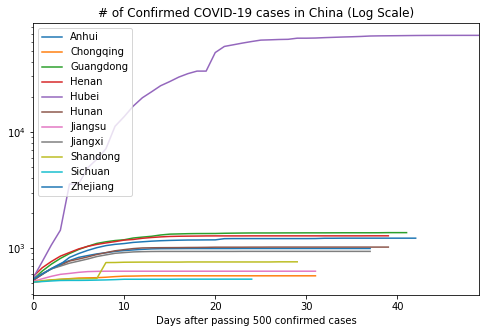

In [15]:
fig, axes = plt.subplots(1, sharex="all", gridspec_kw={'height_ratios': [1]}, figsize=(8, 5))

for s in data.keys():
    data[s].plot(logy=True)

axes.legend()
axes.set_title("# of Confirmed COVID-19 cases in China (Log Scale)")
axes.set_xlabel("Days after passing 500 confirmed cases")

Text(0.5, 0, 'Days after passing 500 confirmed cases')

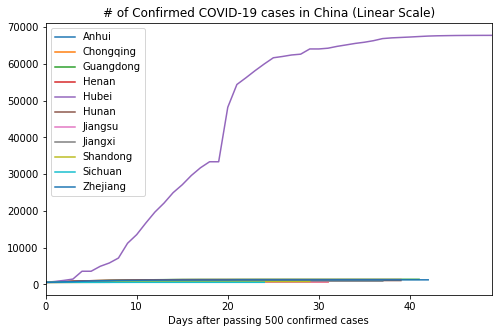

In [16]:
fig, axes = plt.subplots(1, sharex="all", gridspec_kw={'height_ratios': [1]}, figsize=(8, 5))

for s in data.keys():
    data[s].plot()

axes.legend()
axes.set_title("# of Confirmed COVID-19 cases in China (Linear Scale)")
axes.set_xlabel("Days after passing 500 confirmed cases")

Text(0.5, 0, 'Dates')

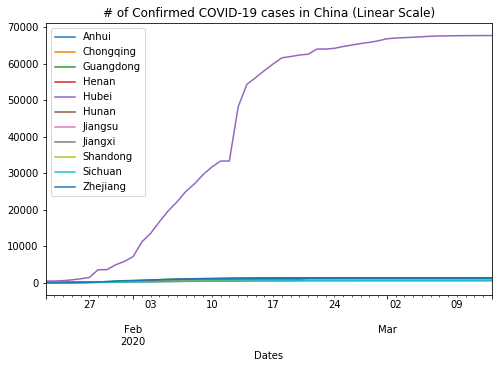

In [17]:
fig, axes = plt.subplots(1, sharex="all", gridspec_kw={'height_ratios': [1]}, figsize=(8, 5))

for s in data.keys():
    data_original[s].plot()

axes.legend()
axes.set_title("# of Confirmed COVID-19 cases in China (Linear Scale)")
axes.set_xlabel("Dates")

In [18]:
today.sum()

80945.0